In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
from matplotlib import pyplot as plt

import data
from models import random_forest_pcc
from modules.experiments import ActiveLearningExperiment, error, hamming_loss, NegLogLikelihoodEvaluator
from plotting import plot_active_learning_phase_diagrams

x = data.x
y = data.y.filter(['sphere', 'worm', 'vesicle', 'other'], axis=1).replace(-1, 0)

## HPMA / CysMA

In [2]:
query1 = (data.x['core_HPMA'] == 1) & (data.x['corona_CysMA'] == 1)
x[query1][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
199,50,10.0,31,0.0,7.0,1,70
200,100,10.0,31,0.0,7.0,1,70
201,150,10.0,31,0.0,7.0,1,70
202,200,10.0,31,0.0,7.0,1,70
203,250,10.0,31,0.0,7.0,1,70
204,300,10.0,31,0.0,7.0,1,70
205,100,15.0,31,0.0,7.0,1,70
206,125,15.0,31,0.0,7.0,1,70
207,150,15.0,31,0.0,7.0,1,70
208,175,15.0,31,0.0,7.0,1,70


In [3]:
# WARNING: computation time around 3.5m

exp1 = ActiveLearningExperiment(random_forest_pcc, x[~query1], x[query1], y[~query1], y[query1], 21, evaluators=[hamming_loss, error])
exp1.run()

.....................


In [4]:
exp1.results_

,round,train_hamming loss,test_hamming loss,train_error,test_error,full_test_hamming loss,full_test_error
0,0,0.0,0.375,0.0,0.772727,0.375000,0.772727
1,1,0.0,0.261905,0.0,0.619048,0.250000,0.590909
2,2,0.0,0.2625,0.0,0.55,0.238636,0.500000
3,3,0.0,0.197368,0.0,0.473684,0.170455,0.409091
4,4,0.0,0.152778,0.0,0.388889,0.125000,0.318182
5,5,0.0,0.073529,0.0,0.235294,0.056818,0.181818
6,6,0.0,0.078125,0.0,0.25,0.056818,0.181818
7,7,0.0,0.066667,0.0,0.2,0.045455,0.136364
8,8,0.0,0.071429,0.0,0.214286,0.045455,0.136364
9,9,0.0,0.038462,0.0,0.153846,0.022727,0.090909


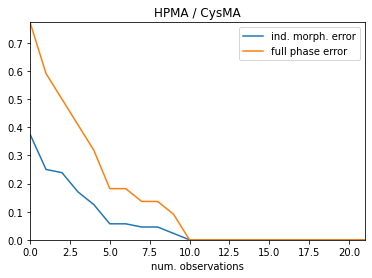

In [7]:
from matplotlib import pyplot as plt

def plot_error_reduction(exp):
    plt.plot(exp.results_['round'], exp.results_['full_test_hamming loss'], label='ind. morph. error')
    plt.plot(exp.results_['round'], exp.results_['full_test_error'], label='full phase error')
    plt.margins(x=0, y=0)
    plt.xlabel('num. observations')
    plt.legend()

plot_error_reduction(exp1)
plt.title('HPMA / CysMA')
plt.show()

/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/var/folders/zh/5y3qbnsx201fr8wp5tgnfq_dy0qrfx/T/ipykernel_12949/3563343936.py:7: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_CysMA.pdf'), bbox_inches='tight', pad_inches=0)


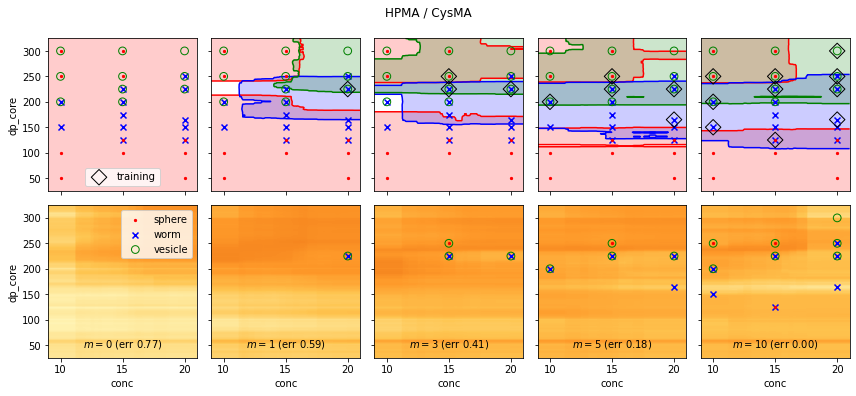

In [8]:
# WARNING: computation time around 40s

exp1_plotting_m = [0, 1, 3, 5, 10]
plot_active_learning_phase_diagrams(exp1, exp1_plotting_m, inline_titles=True)
plt.suptitle('HPMA / CysMA')
from common import OUTPUTPATH
plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_CysMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

## MEMA / GMA

In [9]:
query2 = (data.x.core_MEMA == 1) & (data.x.corona_GMA == 1)
x[query2][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
424,30,10.0,29,0.0,3.5,0,70
425,35,10.0,29,0.0,3.5,0,70
426,38,10.0,29,0.0,3.5,0,70
427,43,10.0,29,0.0,3.5,0,70
428,58,10.0,29,0.0,3.5,0,70
429,70,10.0,29,0.0,3.5,0,70
430,74,10.0,29,0.0,3.5,0,70
431,78,10.0,29,0.0,3.5,0,70
432,84,10.0,29,0.0,3.5,0,70
433,89,10.0,29,0.0,3.5,0,70


In [13]:
# WARNING: computation time around 3:00m - 4:00m (after adding Hamming loss)

exp2 = ActiveLearningExperiment(random_forest_pcc, x[~query2], x[query2], y[~query2], y[query2], 25, evaluators=[hamming_loss, error])
exp2.run()

.........................


In [14]:
exp2.results_

,round,train_hamming loss,test_hamming loss,train_error,test_error,full_test_hamming loss,full_test_error
0,0,0.0,0.384615,0.0,0.730769,0.384615,0.730769
1,1,0.0,0.38,0.0,0.72,0.365385,0.692308
2,2,0.0,0.416667,0.0,0.875,0.384615,0.807692
3,3,0.0,0.478261,0.0,0.956522,0.423077,0.846154
4,4,0.0,0.306818,0.0,0.727273,0.259615,0.615385
5,5,0.0,0.309524,0.0,0.619048,0.250000,0.500000
6,6,0.0,0.2125,0.0,0.45,0.163462,0.346154
7,7,0.0,0.184211,0.0,0.368421,0.134615,0.269231
8,8,0.0,0.083333,0.0,0.166667,0.057692,0.115385
9,9,0.0,0.147059,0.0,0.294118,0.096154,0.192308


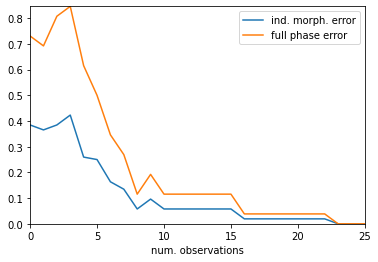

In [15]:
plot_error_reduction(exp2)

/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/var/folders/zh/5y3qbnsx201fr8wp5tgnfq_dy0qrfx/T/ipykernel_12949/17124601.py:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(os.path.join(OUTPUTPATH, 'MEMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)


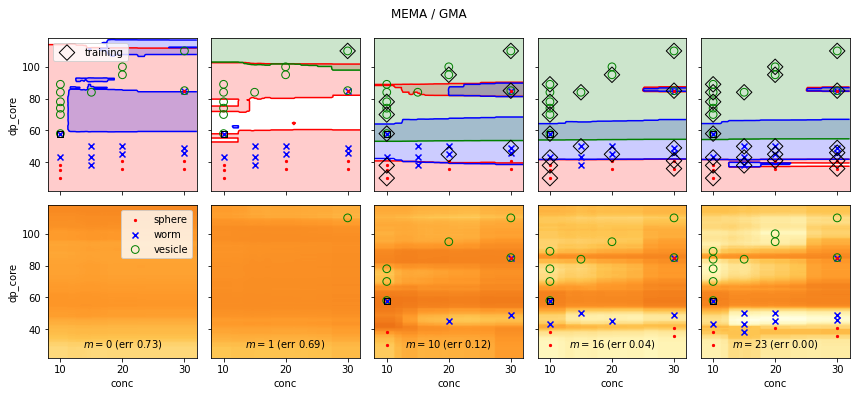

In [16]:
exp2_plotting_m = [0, 1, 10, 16, 23]
plot_active_learning_phase_diagrams(exp2, exp2_plotting_m, inline_titles=True)
plt.suptitle('MEMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'MEMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

## HPMA / GMA

In [17]:
query3 = (data.x.core_HPMA == 1) & (data.x.corona_GMA == 1) & (data.x.dp_corona==78) & (data.x.salt==0) & (data.x.ph==7) & (data.x.charged==0) & (data.x.temp==70)
sum(query3), sum(~query3)

(44, 548)

In [18]:
#Warning: 5:30m - 7:00 (with Hamming loss)

exp3 = ActiveLearningExperiment(random_forest_pcc, x[~query3], x[query3], y[~query3], y[query3], 43, evaluators=[hamming_loss, error])
exp3.run()

...........................................


In [19]:
exp3.results_

,round,train_hamming loss,test_hamming loss,train_error,test_error,full_test_hamming loss,full_test_error
0,0,0.0,0.335227,0.0,0.772727,0.335227,0.772727
1,1,0.0,0.30814,0.0,0.72093,0.301136,0.704545
2,2,0.0,0.220238,0.0,0.642857,0.210227,0.613636
3,3,0.0,0.25,0.0,0.682927,0.232955,0.636364
4,4,0.0,0.24375,0.0,0.675,0.221591,0.613636
5,5,0.0,0.217949,0.0,0.641026,0.193182,0.568182
6,6,0.0,0.190789,0.0,0.578947,0.164773,0.500000
7,7,0.0,0.162162,0.0,0.540541,0.136364,0.454545
8,8,0.0,0.118056,0.0,0.416667,0.096591,0.340909
9,9,0.0,0.142857,0.0,0.514286,0.113636,0.409091


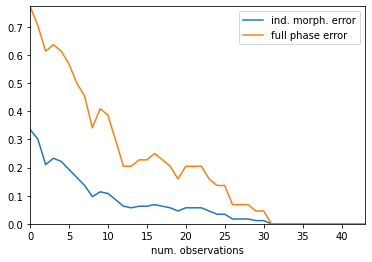

In [20]:
plot_error_reduction(exp3)

/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/var/folders/zh/5y3qbnsx201fr8wp5tgnfq_dy0qrfx/T/ipykernel_12949/2184524375.py:4: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)


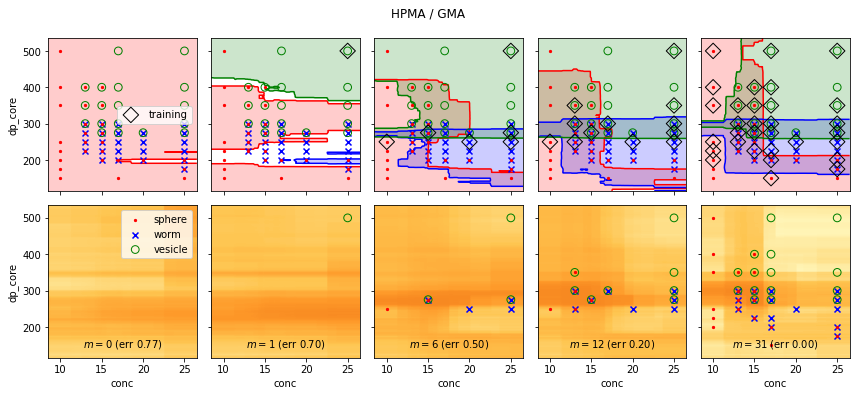

In [21]:
exp3_plotting_m = [0, 1, 6, 12, 31]
plot_active_learning_phase_diagrams(exp3, exp3_plotting_m, inline_titles=True)
plt.suptitle('HPMA / GMA')
plt.savefig(os.path.join(OUTPUTPATH, 'HPMA_GMA.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()

/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


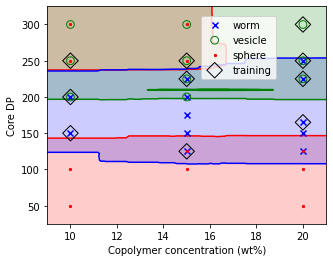

In [22]:
from plotting import x_grid_data_around_sample, plot_marginal_morphology_contours, scatter_phases, SCATTER_STYLE_TRAINING
from common import OUTPUTPATH
import os

plt.figure(figsize=(5, 4))
xx1, xx2, grid_points = x_grid_data_around_sample(exp1.x_test[0], 'conc', 'dp_core', resolution=100)
pp = exp1.fits[10].predict_proba(grid_points)
plot_marginal_morphology_contours(xx1, xx2, pp)
scatter_phases(exp1.y_test[0], exp1.x_test[0]['conc'], exp1.x_test[0]['dp_core'], other=False)
plt.scatter(exp1.x_train[10][-10:]['conc'], exp1.x_train[10][-10:]['dp_core'], **SCATTER_STYLE_TRAINING)
plt.xlabel('Copolymer concentration (wt%)')
plt.ylabel('Core DP')
plt.legend(loc=(0.55, 2/3))
plt.savefig(os.path.join(OUTPUTPATH, 'phases_10_HPMA_CYSMA.pdf'), bbox_inches='tight', pad_inches=0)
# phases_3_GMA_CYSMA
plt.show()


## GlyMA / GMA

In [17]:
query4 = (data.x.core_GlyMA == 1) & (data.x.corona_GMA == 1)
x[query4][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
311,100,10.0,45,0.0,5.20,0,70
312,100,10.0,45,0.0,7.10,0,70
313,100,10.0,45,0.0,4.50,0,40
314,100,10.0,45,0.0,7.20,0,40
315,100,10.0,45,0.0,4.20,0,50
316,100,10.0,45,0.0,7.10,0,50
317,300,10.0,45,0.0,7.00,0,50
318,400,10.0,45,0.0,7.00,0,50
319,100,10.0,45,0.0,3.00,0,30
327,25,15.0,25,0.0,2.75,0,50


In [18]:
exp4 = ActiveLearningExperiment(random_forest_pcc, x[~query4], x[query4], y[~query4], y[query4], 12)
exp4.run()

............


/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


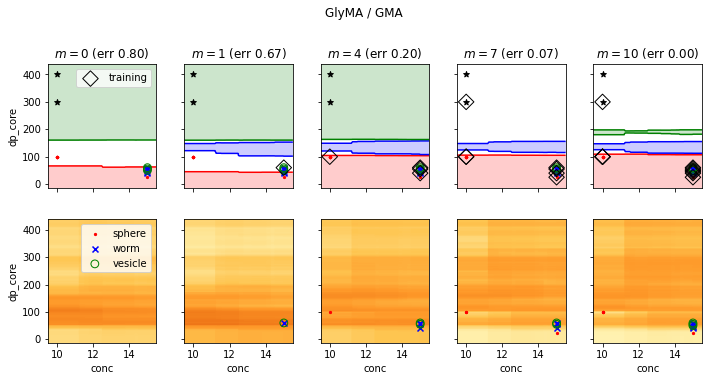

In [19]:
plot_active_learning_phase_diagrams(exp4)
plt.suptitle('GlyMA / GMA')
plt.show()

## BzMA / GMA

In [20]:
query5 = (data.x.core_BzMA == 1) & (data.x.corona_GMA == 1)
x[query5][['dp_core', 'conc', 'dp_corona', 'salt', 'ph', 'charged', 'temp']]

,dp_core,conc,dp_corona,salt,ph,charged,temp
555,50,10.0,51,0.0,7.0,0,70
556,75,10.0,51,0.0,7.0,0,70
557,100,10.0,51,0.0,7.0,0,70
558,125,10.0,51,0.0,7.0,0,70
559,150,10.0,51,0.0,7.0,0,70
560,175,10.0,51,0.0,7.0,0,70
561,200,10.0,51,0.0,7.0,0,70
562,250,10.0,51,0.0,7.0,0,70
563,300,10.0,51,0.0,7.0,0,70
564,400,10.0,51,0.0,7.0,0,70


In [21]:
exp5 = ActiveLearningExperiment(random_forest_pcc, x[~query5], x[query5], y[~query5], y[query5], 12)
exp5.run()


............


/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/usr/local/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: This figure was using constrained_layout, but that is incompatible with subplots_adjust and/or tight_layout; disabling constrained_layout.
  fig.canvas.print_figure(bytes_io, **kw)


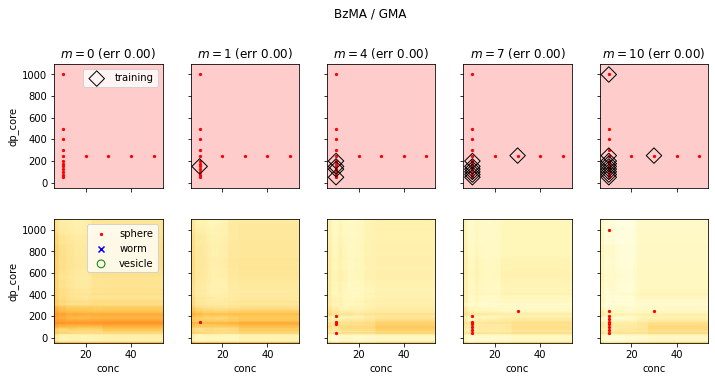

In [22]:
plot_active_learning_phase_diagrams(exp5)
plt.suptitle('BzMA / GMA')
plt.show()

# Combined Figure

/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


/Users/mbol0005/Repositories/PISA_ML/data.py:207: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append([deepcopy(prototype) for _ in range(m*n)], ignore_index=True)


.....


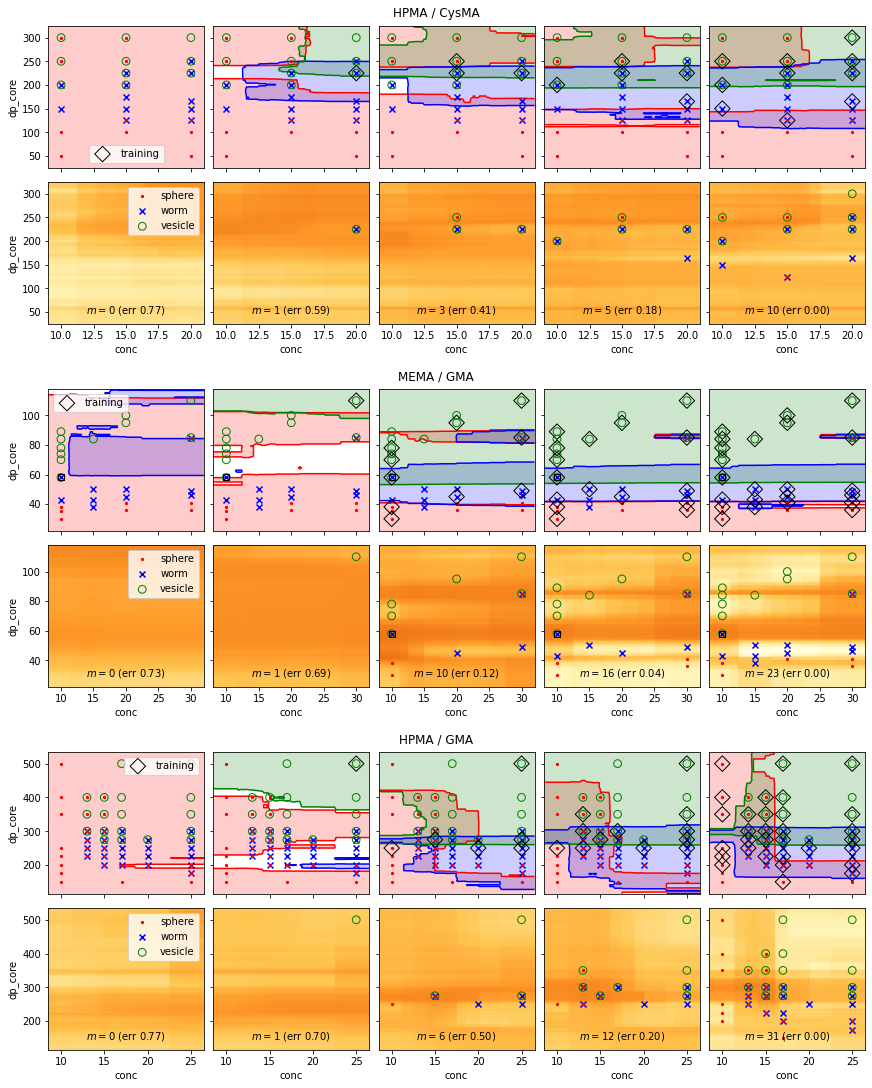

In [23]:
from plotting import plot_active_learning_phase_diagrams, x_grid_data_around_sample, scatter_phases, SCATTER_STYLE_TRAINING, SCATTER_STYLE_WORM, SCATTER_STYLE_SPHERE, SCATTER_STYLE_VESICLE, plot_marginal_morphology_contours
from scipy.stats import entropy

fig = plt.figure(figsize=(12, 15), constrained_layout=True)
subfigs = fig.subfigures(3, 1, hspace=0.025)
plot_active_learning_phase_diagrams(exp1, exp1_plotting_m, subfigs[0], inline_titles=True)
subfigs[0].suptitle('HPMA / CysMA')
plot_active_learning_phase_diagrams(exp2, exp2_plotting_m, subfigs[1], inline_titles=True)
subfigs[1].suptitle('MEMA / GMA')
plot_active_learning_phase_diagrams(exp3, exp3_plotting_m, subfigs[2], inline_titles=True)
subfigs[2].suptitle('HPMA / GMA')

plt.savefig(os.path.join(OUTPUTPATH, 'active_learning_combined.pdf'), bbox_inches='tight', pad_inches=0)
plt.show()